## THE SPARKS FOUNDATION #GRIPSEP22

## Author-Saranya,DATA SCIENCE & BUSINESS ANALYTICS INTERN

# TASK1-Prediction Using Supervised ML

Perform exploratory Data Analysis on dataset to predict the percentage of marks of thr students based on the number of hours they studied.

Dataset Sample:"http://bit.ly/w-data"

IMPORTING

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

READING THE DATASET

In [ ]:
#Reading the Data
data=pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


ANALYSING

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:

#check if there any null value in the Dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


There is no null value in the Dataset so, we can now visualize our Data.

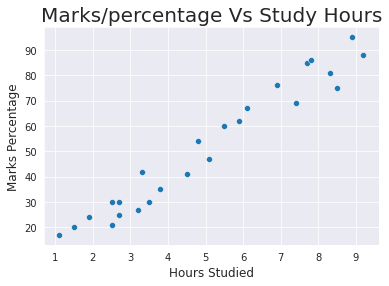

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'],x= data['Hours'])
plt.title('Marks/percentage Vs Study Hours', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be correlation between the'Marks Percentage' and 'Hours studied',Lets plot a regression Line to confirm the correlation.

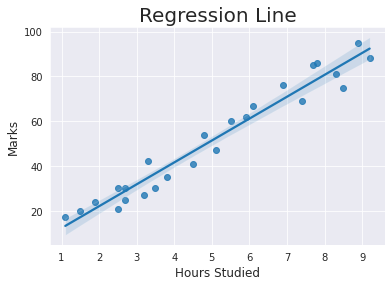

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x=data['Hours'],y= data['Scores'])
plt.title('Regression Line',size=20)
plt.ylabel('Marks', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

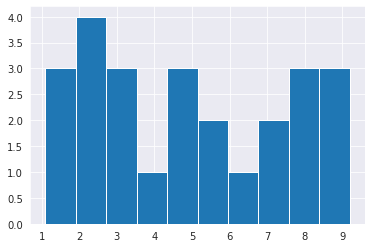

In [ ]:
plt.hist(data['Hours'])

# Preparing the Data

Splitting the data

In [ ]:
#Defining x and y rom the Data
x=data.iloc[:, :-1].values
print(x)
y=data.iloc[:, 1].values
print(y)

#Splitting the Dats in two
train_x, val_x,train_y,val_y=train_test_split(x,y, random_state= 0)
regression=LinearRegression()
regression.fit(train_x, train_y)
print(".....Model Trained..")

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
.....Model Trained..


Compare the Predicted Marks with the Actual Marks

In [ ]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours' : [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Compare the Predicted Marks With Actual Marks**

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visual Comparison

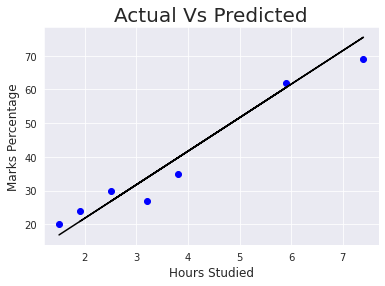

In [ ]:
plt.scatter(x=val_x, y=val_y, color='blue')
plt.plot(val_x, pred_y, color='Black')
plt.title('Actual Vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


Evaluating the Model

In [ ]:
#Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Testing the Predicted Score of a student if he/she studies for 9.25 hrs/day?

In [ ]:
# You can also test with your own data
hours = [9.25]
answer=regression.predict([hours])
print("Predicted Score = {}".format(round(answer[0],3)))

Predicted Score = 93.893
